# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

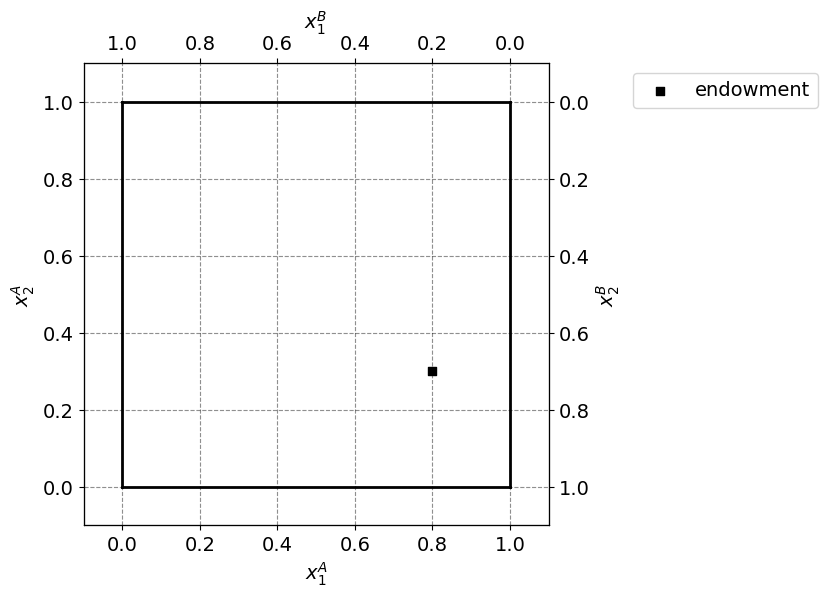

# Question 1

**Explain how you solve the model**

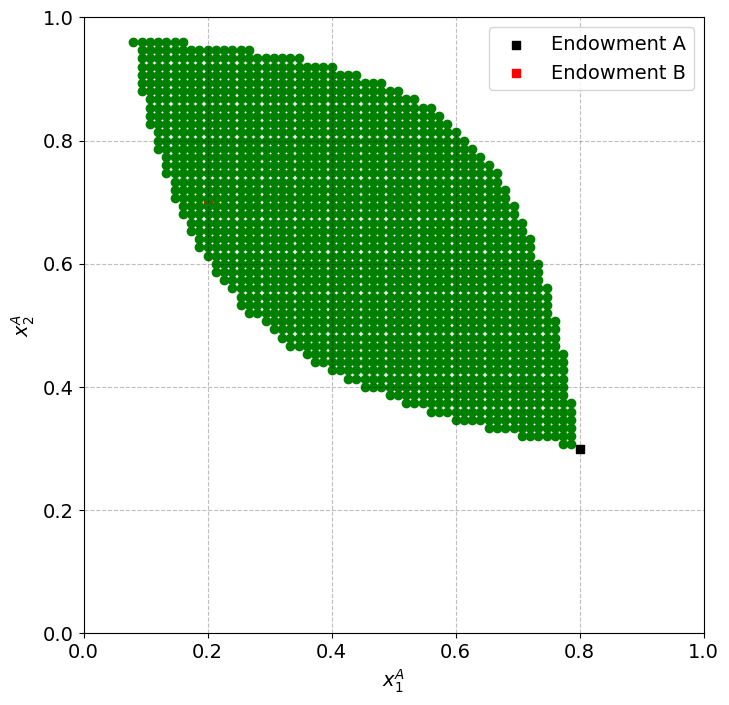

In [14]:
# code for solving the model (remember documentation and comments)

from Question1 import EdgeworthBoxClass 

box = EdgeworthBoxClass()

# The Edgeworth box with Pareto improvements for set C
box.plot_edgeworth_box()

# Question 2

Explain your code and procedure

In [1]:
from types import SimpleNamespace

class ErrorMarketClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3
        par.p2 = 1
        self.N = 75

    def utility_A(self,x1A,x2A):
        return x1A **self.alpha * x2A **(1-self.alpha)

    def utility_B(self,x1B,x2B):
        return x1B**self.beta * x2B**(1 - self.beta)

    def demand_A(self,p1):
        self.alpha(p1 * self.W1A + self.p2 * self.W2A) / p1

    def demand_B(self,p1):
         self.beta*(p1 * self.W1A + self.p2 * self.W2A) / p1

    def check_market_clearing(self,p1):

     par = self.par
     self.rho1 = [0.5+2* i/self.N for i in range(self.N +1)]

     errors = []

     for p1 in self.rho1:
         x1A,x2A = self.demand_A(p1)
         x1B,x2B = self.demand_B(p1)
         eps1 = x1A-par.w1A + x1B-(1-par.w1A)
         eps2 = x2A-par.w2A + x2B-(1-par.w2A)
         errors.append((eps1, eps2))


     return eps1,eps2

# Question 3

Explain your code and procedure

In [16]:
# code

# Question 4a

# Question 4b

# Question 5a

# Question 6a

# Question 6b

# Question 7

# Question 8


ADD CONCISE CONLUSION.